In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting in Jupyter notebook
%matplotlib inline


In [2]:
# Import data from csv file
data = pd.read_csv("https://github.com/alanjones2/dataviz/raw/master/london2018.csv")


In [3]:
# Show the data
data


,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [4]:
# Create a new column 'Tmean' as the average of 'Tmax' and 'Tmin'
data['Tmean'] = (data['Tmax'] + data['Tmin']) / 2


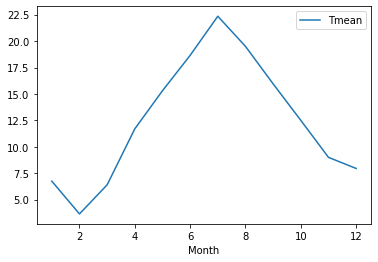

In [5]:
# Draw a line chart of Tmean over Month
data.plot(x='Month', y='Tmean', kind='line')
plt.show()


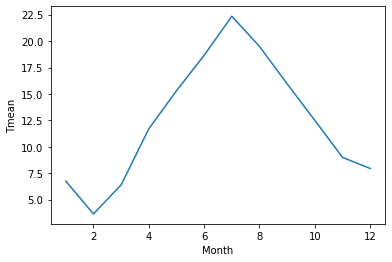

In [6]:
plt.plot(data['Month'], data['Tmean'])
plt.xlabel('Month')
plt.ylabel('Tmean')
plt.show()


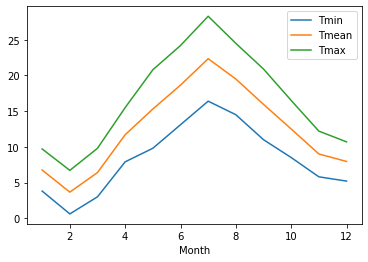

In [7]:
# Draw a line chart of Tmin, Tmean, and Tmax over Month
data.plot(x='Month', y=['Tmin','Tmean','Tmax'], kind='line')
plt.show()


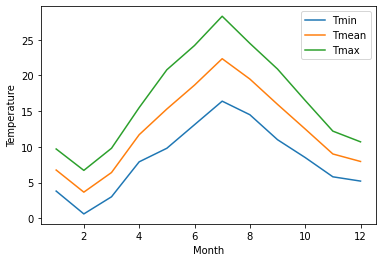

In [8]:
plt.plot(data['Month'], data['Tmin'],label='Tmin')
plt.plot(data['Month'], data['Tmean'],label='Tmean')
plt.plot(data['Month'], data['Tmax'],label='Tmax')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()


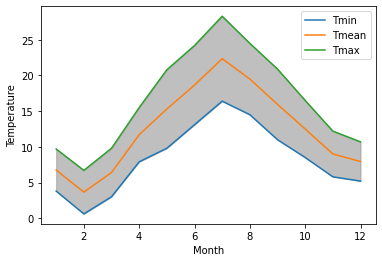

In [9]:
# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax
plt.fill_between(data['Month'], data['Tmin'], data['Tmax'], color='gray', alpha=0.5)
plt.plot(data['Month'], data['Tmin'],label='Tmin')
plt.plot(data['Month'], data['Tmean'],label='Tmean')
plt.plot(data['Month'], data['Tmax'],label='Tmax')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()


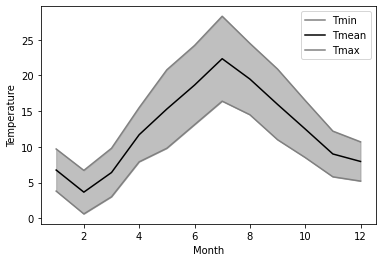

In [10]:
# Draw a line chart of Tmin, Tmean, and Tmax over Month with Tmin and Tmax lines the same color as the shading and Tmean black
plt.fill_between(data['Month'], data['Tmin'], data['Tmax'], color='gray', alpha=0.5)
plt.plot(data['Month'], data['Tmin'],label='Tmin', color='gray')
plt.plot(data['Month'], data['Tmean'],label='Tmean', color='black')
plt.plot(data['Month'], data['Tmax'],label='Tmax', color='gray')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [11]:
# we forgot numpy
import numpy as np

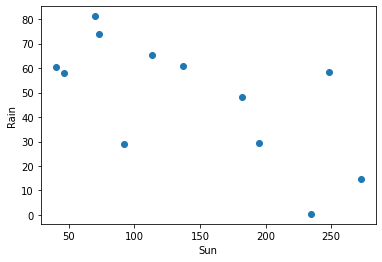

In [12]:
# Draw a scatter diagram of Sun against Rain
plt.scatter(data['Sun'], data['Rain'])
plt.xlabel('Sun')
plt.ylabel('Rain')
plt.show()


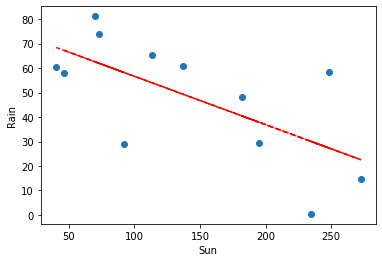

In [13]:
# Draw a scatter diagram of Sun against Rain with a trend line
plt.scatter(data['Sun'], data['Rain'])
plt.xlabel('Sun')
plt.ylabel('Rain')

# Add a trend line
z = np.polyfit(data['Sun'], data['Rain'], 1)
p = np.poly1d(z)
plt.plot(data['Sun'],p(data['Sun']),"r--")

plt.show()


In [14]:
# Import the plotly library
import plotly.express as px

# Draw a scatter diagram of Sun against Rain with a trend line using plotly
fig = px.scatter(data, x='Sun', y='Rain', trendline='ols')
fig.show()


In [15]:
# Import the plotly library
import plotly.graph_objs as go

# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax in plotly
trace1 = go.Scatter(x=data['Month'], y=data['Tmin'],mode='lines', name='Tmin')
trace2 = go.Scatter(x=data['Month'], y=data['Tmean'],mode='lines', name='Tmean')
trace3 = go.Scatter(x=data['Month'], y=data['Tmax'],mode='lines', name='Tmax')

fig = go.Figure(data=[trace1, trace2, trace3])
fig.update_layout(shapes=[dict(type='rect',
                              xref='x', yref='paper',
                              x0=data['Month'].min(), y0=0,
                              x1=data['Month'].max(), y1=1,
                              fillcolor='gray', opacity=0.5,
                              layer='below', line_width=0)])
fig.show()


In [16]:
# Import the plotly library
import plotly.graph_objects as go

# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Month'], y=data['Tmin'], mode='lines', name='Tmin', line=dict(color='gray')))
fig.add_trace(go.Scatter(x=data['Month'], y=data['Tmean'], mode='lines', name='Tmean', line=dict(color='black')))
fig.add_trace(go.Scatter(x=data['Month'], y=data['Tmax'], mode='lines', name='Tmax', line=dict(color='gray')))
fig.update_layout(shapes=[dict(type='rect', xref='x', yref='paper', x0=data['Month'].min(), y0=0, x1=data['Month'].max(), y1=1, fillcolor='gray', opacity=0.5, layer='below', line_width=0)])
fig.show()


This didn't work!

In [17]:
# Import the plotly library
import plotly.graph_objs as go

# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax using plotly
trace1 = go.Scatter(x=data['Month'], y=data['Tmin'], name='Tmin', fill='tozeroy', mode='none')
trace2 = go.Scatter(x=data['Month'], y=data['Tmean'], name='Tmean', mode='lines', line=dict(width=2, color='black'))
trace3 = go.Scatter(x=data['Month'], y=data['Tmax'], name='Tmax', fill='tonexty', mode='none')
data_plotly = [trace1, trace2, trace3]
layout = go.Layout(title='Tmin, Tmean and Tmax over Month')
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()


In [18]:
# Import the plotly library
import plotly.graph_objs as go

# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax using plotly

trace1 = go.Scatter(x=data['Month'], y=data['Tmin'],mode='lines', name='Tmin', line=dict(color='gray'))
trace2 = go.Scatter(x=data['Month'], y=data['Tmean'],mode='lines', name='Tmean', line=dict(color='black'))
trace3 = go.Scatter(x=data['Month'], y=data['Tmax'],mode='lines', name='Tmax', line=dict(color='gray'))
trace4 = go.Scatter(x=data['Month'], y=data['Tmin'],mode='none', fill='tonexty', fillcolor='gray', showlegend=False)

data_plotly = [trace1, trace2, trace3,trace4]
layout = go.Layout(yaxis=dict(title='Temperature'))
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()


In [19]:
# Import the plotly library
import plotly.graph_objs as go

# Draw a line chart of Tmin, Tmean, and Tmax over Month with shading between Tmin and Tmax using plotly

greycolor = fillcolor = 'rgba(180,180,180,0.5)'

trace1 = go.Scatter(x=data['Month'], y=data['Tmin'],mode='lines', name='Tmin', line=dict(color=greycolor))
trace2 = go.Scatter(x=data['Month'], y=data['Tmean'],mode='lines', name='Tmean', line=dict(color='black'))
trace3 = go.Scatter(x=data['Month'], y=data['Tmax'],mode='lines', name='Tmax', line=dict(color=greycolor))
trace4 = go.Scatter(x=data['Month'], y=data['Tmin'],mode='none', fill='tonexty', fillcolor=greycolor, showlegend=False)

data_plotly = [trace1, trace2, trace3,trace4]
layout = go.Layout(yaxis=dict(title='Temperature'))
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()
